In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
import datetime

from pathlib import Path
from run_analysis import postprocess, preprocess

sns.set_theme(style='darkgrid')

In [2]:
eraDf = pd.read_csv(os.path.join('Analysis', 'eraDf.csv'))
remsDf = pd.read_csv(os.path.join('Analysis', 'remsDf.csv'))
outDf = pd.read_csv(os.path.join('Analysis', 'outDf.csv'))

remsDf.timemet = remsDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
eraDf.timemet = eraDf.timemet.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
outDf.time = outDf.time.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [4]:
print(outDf.time.min())
print(outDf.time.max())

era_only = False

time_lim = [datetime.datetime.strptime("2015-04-20 01:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-20 06:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = [datetime.datetime.strptime("2015-04-06 00:00:00", '%Y-%m-%d %H:%M:%S'), 
            datetime.datetime.strptime("2015-04-23 23:00:00", '%Y-%m-%d %H:%M:%S')]
time_lim = None

2015-04-01 00:00:00
2015-04-30 23:00:00


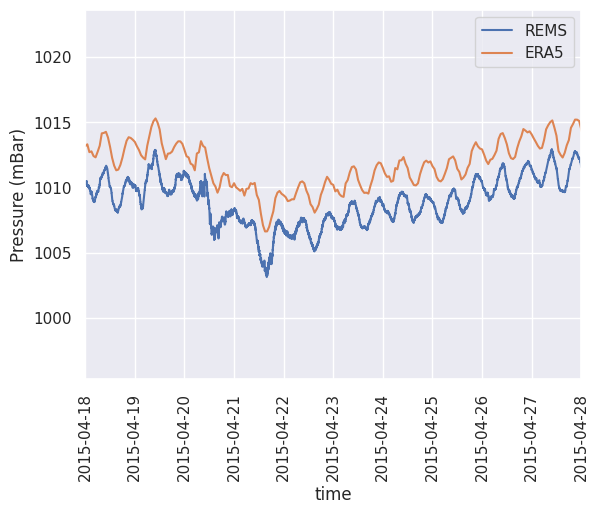

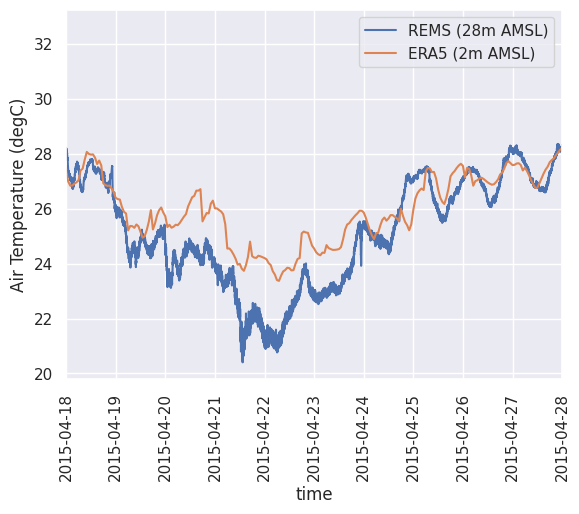

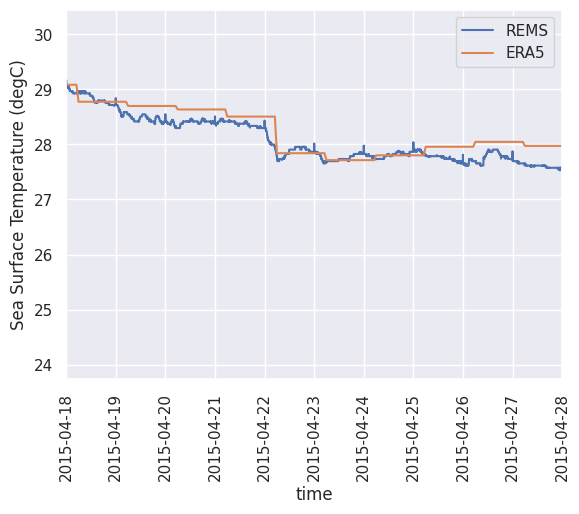

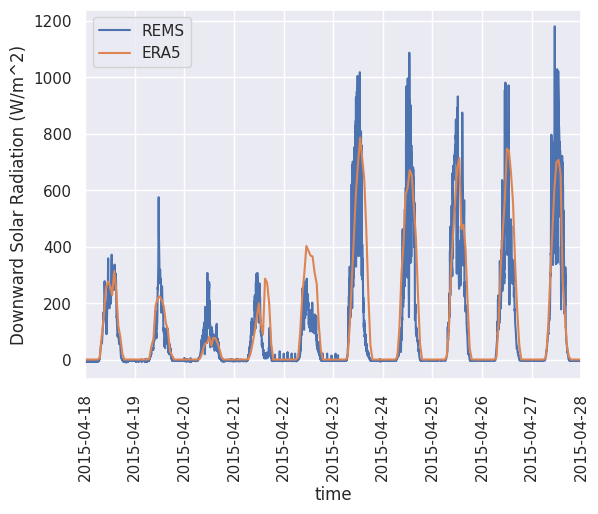

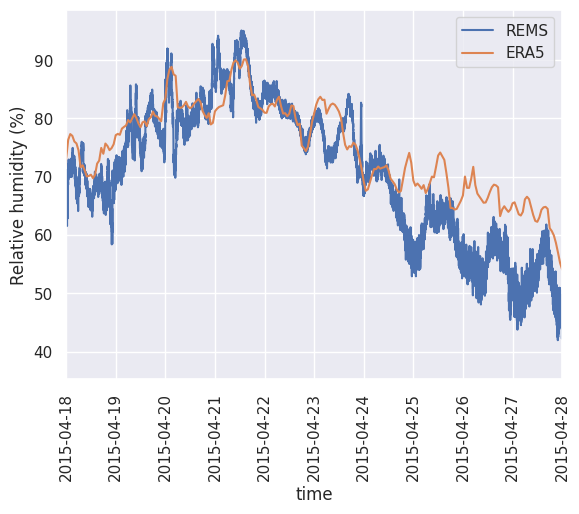

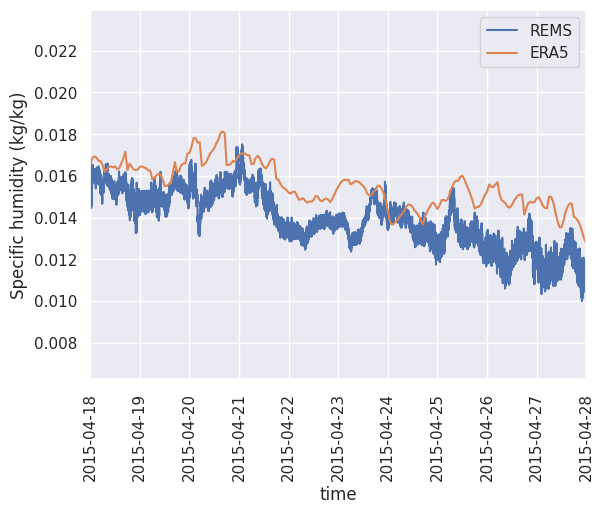

In [4]:
preprocess(eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

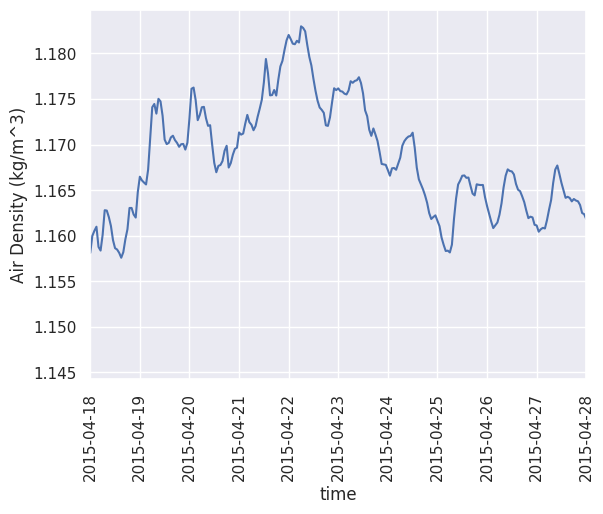

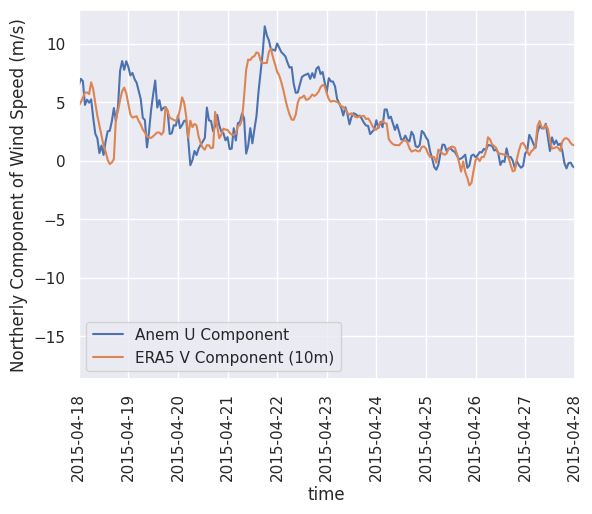

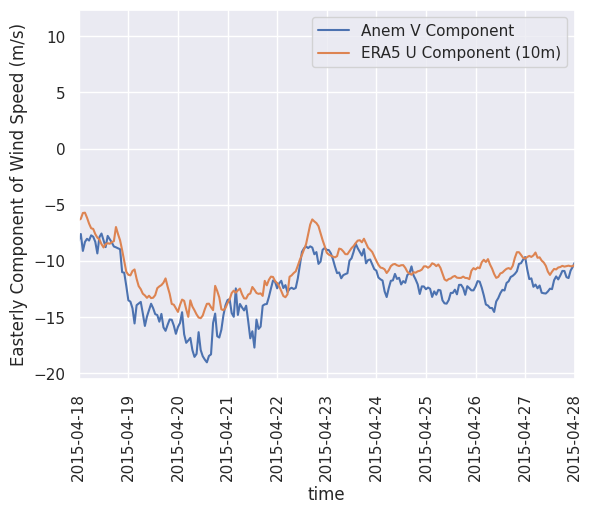

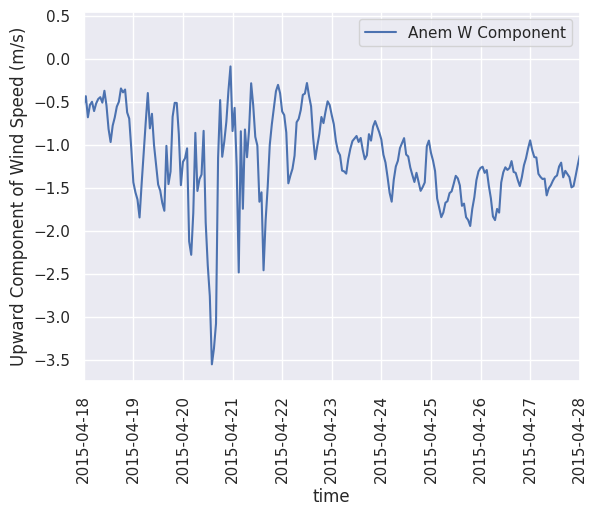

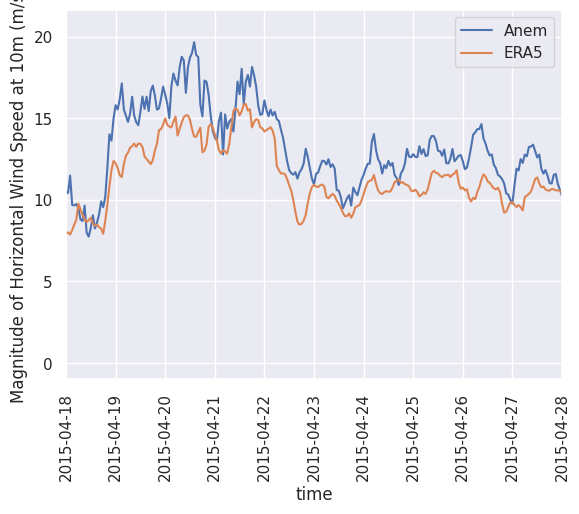

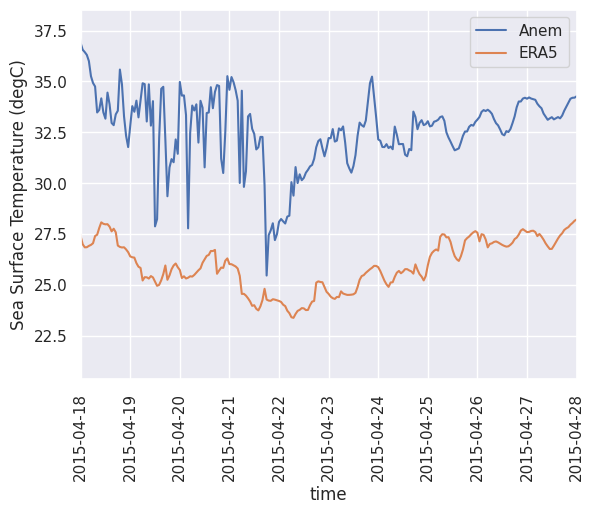

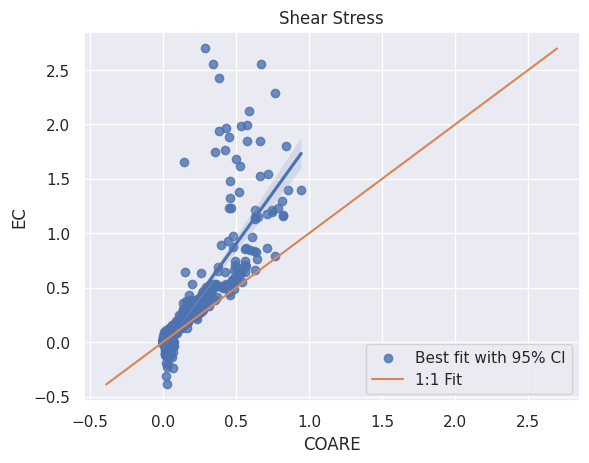

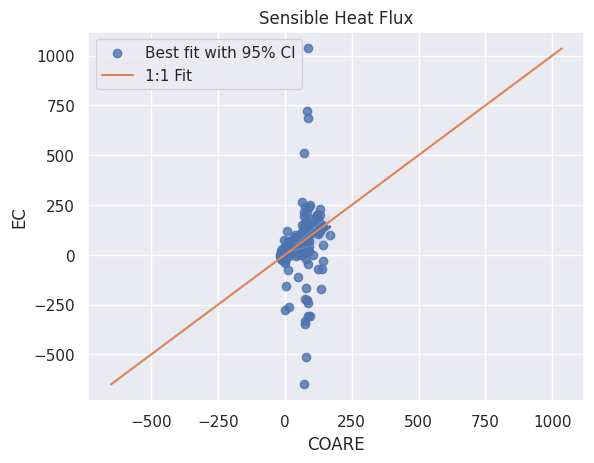

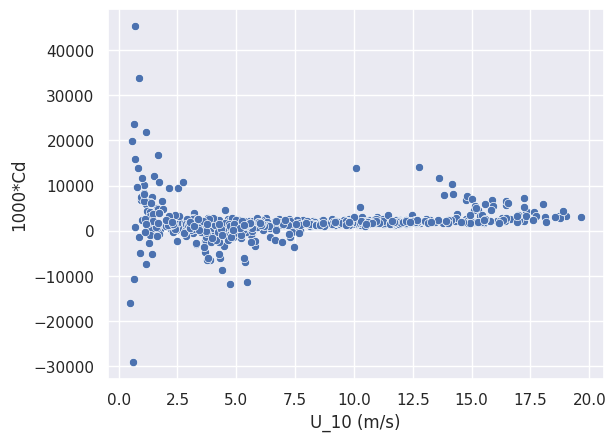

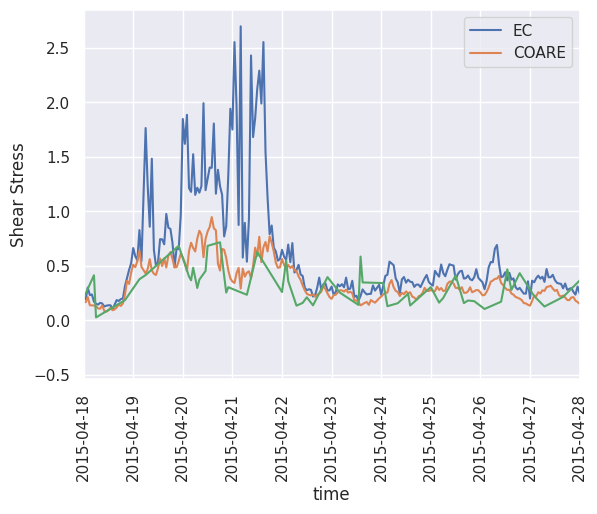

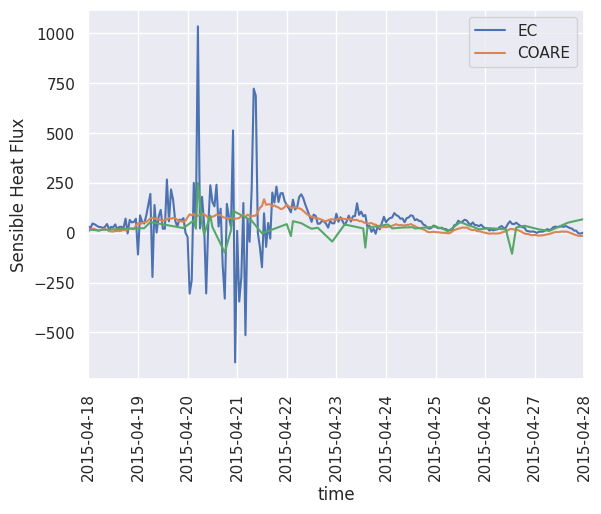

ValueError: Could not interpret value `crr` for parameter `y`

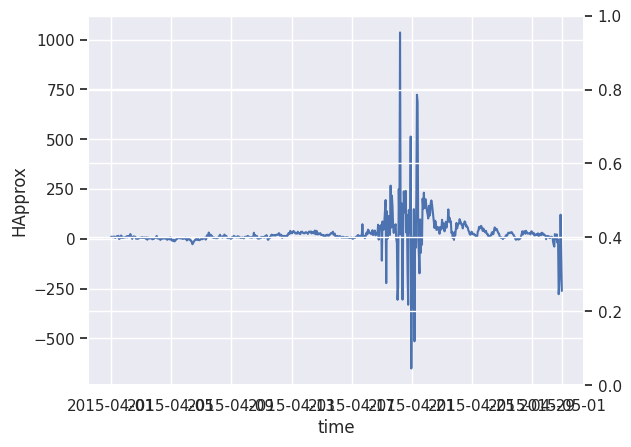

In [4]:
postprocess(outDf, eraDf, remsDf, writeDir=None, era_only=era_only, save_plots=False, time_lim=time_lim);

<Axes: xlabel='time', ylabel='HApprox'>

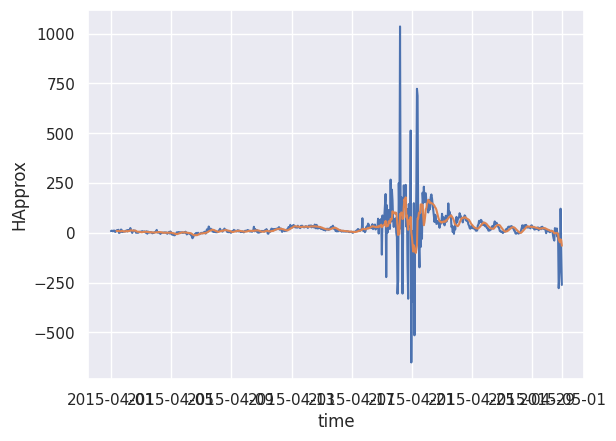

In [30]:
outDf = outDf.sort_values(by='time')
windows = outDf.HApprox.rolling(window=10)#, step=10)#, center=True, win_type='cosine')

sns.lineplot(data=outDf, x='time', y='HApprox')
sns.lineplot(x=outDf.time, y=windows.mean())
# plt.xlim([datetime.datetime.strptime("2015-04-05 01:00:00", '%Y-%m-%d %H:%M:%S'), 
#     datetime.datetime.strptime("2015-04-08 06:00:00", '%Y-%m-%d %H:%M:%S')])


In [5]:
s = outDf.HApprox
window_width = 5 # Amount of indicies to consider = wanted_stepsize/data_stepsize
windows = s.rolling(window=window_width, step=window_width)

logical = pd.Series(len(s)*[False])#s == s
for window in windows:
    std = window.std()
    mean = window.mean()
    
    print(np.abs(s[window.index] - mean) > 0.5*std)
    logical[window.index] = np.abs(s[window.index] - mean) > 0.5*std


0    False
Name: HApprox, dtype: bool
1    False
2    False
3     True
4     True
5     True
Name: HApprox, dtype: bool
6     False
7     False
8      True
9     False
10     True
Name: HApprox, dtype: bool
11    True
12    True
13    True
14    True
15    True
Name: HApprox, dtype: bool
16    False
17     True
18    False
19    False
20     True
Name: HApprox, dtype: bool
21     True
22     True
23    False
24    False
25    False
Name: HApprox, dtype: bool
26     True
27     True
28    False
29     True
30     True
Name: HApprox, dtype: bool
31     True
32     True
33    False
34    False
35     True
Name: HApprox, dtype: bool
36     True
37     True
38    False
39    False
40     True
Name: HApprox, dtype: bool
41     True
42    False
43    False
44    False
45    False
Name: HApprox, dtype: bool
46    False
47     True
48     True
49     True
50    False
Name: HApprox, dtype: bool
51     True
52    False
53     True
54     True
55     True
Name: HApprox, dtype: bool
56     True
57 

591    False
592     True
593     True
594     True
595    False
Name: HApprox, dtype: bool
596     True
597     True
598     True
599    False
600     True
Name: HApprox, dtype: bool
601     True
602    False
603     True
604     True
605    False
Name: HApprox, dtype: bool
606     True
607    False
608     True
609    False
610     True
Name: HApprox, dtype: bool
611     True
612     True
613     True
614    False
615    False
Name: HApprox, dtype: bool
616    False
617    False
618     True
619     True
620    False
Name: HApprox, dtype: bool
621    True
622    True
623    True
624    True
625    True
Name: HApprox, dtype: bool
626     True
627     True
628    False
629    False
630    False
Name: HApprox, dtype: bool
631    False
632     True
633     True
634    False
635    False
Name: HApprox, dtype: bool
636    True
637    True
638    True
639    True
640    True
Name: HApprox, dtype: bool
641     True
642     True
643    False
644     True
645    False
Name: HApprox, dtype: boo

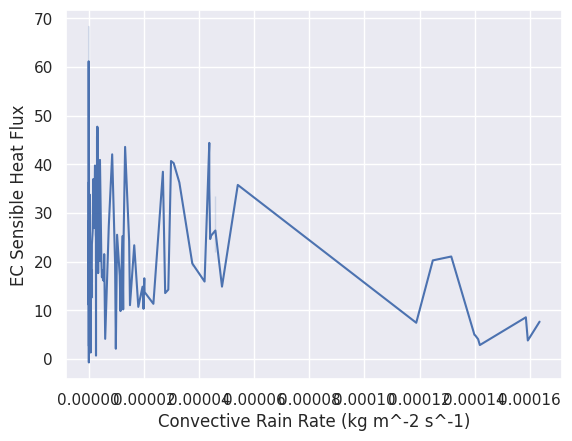

In [32]:
crr = eraDf.crr[eraDf.timemet.isin(outDf.time)].reset_index(drop=True)
rolling_crr = crr.rolling(window=10, center=True)
rolling_H = outDf.HApprox.rolling(window=10, center=True)

sns.lineplot(x=rolling_crr.mean(), y=rolling_H.mean(), markers=True)
plt.xlabel('Convective Rain Rate (kg m^-2 s^-1)')
plt.ylabel('EC Sensible Heat Flux')
#plt.xlim([-1e-7, 0.5e-5])
plt.show()